In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exp_name = "exp_adult_boostrap_continuous_seq"
exp_number = "test_2"
base_path = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness"
data_path = base_path + "/my_code/Bayesian-fairness/data"
results_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/{exp_name}/{exp_number}"

In [3]:
results_path2 = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/exp_compas_boostrap_continuous_seq/paper_loss_reproduce/l_0.0"

In [4]:
results_path

'/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/exp_adult_boostrap_continuous_seq/test_2'

In [5]:
results_path2

'/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/exp_compas_boostrap_continuous_seq/paper_loss_reproduce/l_0.0'

# Plots

In [6]:
metric_symbol = {"Balance": "B",
                 "Utility": "U",
                 "Fairness": "F"}
runs = range(8)

In [7]:
l_exp = "l_0.0"
bootstrap_results = pd.read_csv(results_path + f"/{l_exp}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
marginal_results = pd.read_csv(results_path + f"/{l_exp}/marginal_results_all.csv",header=[0, 1],index_col=[0])

In [8]:
def get_metrics_from_multi_columns(data, metric_name, runs):
    metrics_columns = [(f"run_{r}", metric_name ) for r in runs]
    data_metric = data[metrics_columns]
    data_metric.columns = [metric_name + f"_{i}" for i in runs]
    return data_metric

In [9]:
boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results, metric_name = "eval_loss", runs=runs)
marginal_loss = get_metrics_from_multi_columns(data=marginal_results, metric_name = "eval_loss", runs=runs)
bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
all_results = {
    "bootstrap_mean":bootstrap_mean,
    "bootstrap_std":bootstrap_std,
    "marginal_mean":marginal_mean,
    "marginal_std":marginal_std,
    
}
all_results = pd.DataFrame(all_results)

In [10]:
def plot_metric(all_results,metric, l ):
    plt.figure()
    plt.plot(range(8), all_results["bootstrap_mean"],"--")
    plt.fill_between(x = range(8),
                     y1 = (all_results["bootstrap_mean"]-all_results["bootstrap_std"]).values,
                     y2 = (all_results["bootstrap_mean"]+all_results["bootstrap_std"]).values,
                     alpha = 0.2)

    plt.plot(range(8), all_results["marginal_mean"],"--")
    plt.fill_between(x = range(8),
                     y1 = (all_results["marginal_mean"]-all_results["marginal_std"]).values,
                     y2 = (all_results["marginal_mean"]+all_results["marginal_std"]).values,
                     alpha = 0.2)
    plt.xlabel("t")
    plt.ylabel(metric_symbol[metric])
    plt.title(f"{metric}, λ= {l}")
    plt.show()
    plt.close()


In [13]:
bootstrap_results

run_0                                                                \
  fairness_loss   utility      loss eval_fairness_loss eval_utility eval_loss   
0      0.196984  0.794901 -0.794901           0.119100     0.780687  0.780687   
1      0.275299  0.791511 -0.791511           0.102212     0.806053  0.806053   
2      0.317861  0.774219 -0.774219           0.117642     0.808962  0.808962   
3      0.338123  0.761167 -0.761167           0.133673     0.809360  0.809360   
4      0.305354  0.737145 -0.737145           0.135940     0.811152  0.811152   
5      0.376114  0.738825 -0.738825           0.151412     0.811971  0.811971   
6      0.373226  0.736447 -0.736447           0.156708     0.812206  0.812206   
7      0.331548  0.732107 -0.732107           0.168598     0.811804  0.811804   
8      0.332340  0.726519 -0.726519           0.169313     0.812669  0.812669   

          run_1                                         ...     run_6  \
  fairness_loss   utility      loss eval_fairness_loss  ...      loss   
0      0.201589  0.763005 -0.763005           0.092877  ... -0.792656   
1      0.289376  0.777700 -0.777700           0.101355  ... -0.780848   
2      0.326877  0.758182 -0.758182           0.129796  ... -0.747764   
3      0.332549  0.748640 -0.748640           0.126509  ... -0.760395   
4      0.394096  0.731176 -0.731176           0.145870  ... -0.743199   
5      0.389188  0.721232 -0.721232           0.156935  ... -0.744723   
6      0.381299  0.724555 -0.724555           0.160820  ... -0.741011   
7      0.357109  0.710648 -0.710648           0.169877  ... -0.723061   
8      0.354634  0.714222 -0.714222           0.169669  ... -0.727875   

                                                    run_7                      \
  eval_fairness_loss eval_utility eval_loss fairness_loss   utility      loss   
0           0.110101     0.782319  0.782319      0.137715  0.742016 -0.742016   
1           0.088179     0.796345  0.796345      0.311599  0.743109 -0.743109   
2           0.071904     0.805965  0.805965      0.346144  0.737787 -0.737787   
3           0.097421     0.807224  0.807224      0.366030  0.741801 -0.741801   
4           0.105243     0.808378  0.808378      0.399084  0.717276 -0.717276   
5           0.110960     0.808687  0.808687      0.411471  0.723245 -0.723245   
6           0.122040     0.809566  0.809566      0.374597  0.713314 -0.713314   
7           0.132411     0.808099  0.808099      0.394472  0.719977 -0.719977   
8           0.142537     0.806354  0.806354      0.361490  0.715004 -0.715004   

                                             
  eval_fairness_loss eval_utility eval_loss  
0           0.144490     0.764561  0.764561  
1           0.123622     0.802070  0.802070  
2           0.158622     0.805722  0.805722  
3           0.163449     0.809198  0.809198  
4           0.174259     0.810100  0.810100  
5           0.184967     0.812085  0.812085  
6           0.195636     0.812603  0.812603  
7           0.207572     0.812481  0.812481  
8           0.204769     0.814194  0.814194  

[9 rows x 48 columns]

In [38]:
all_bootstrap_fairness =  []
all_marginal_fairness = []

all_bootstrap_utility =  []
all_marginal_utility = []
for l in [0.0, 0.1, 0.25, 0.5, 0.75, 1.0] :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    # get fairness
    boostrap_fairness = get_metrics_from_multi_columns(data=bootstrap_results,
                                                   metric_name = "eval_fairness_loss",
                                                   runs=range(8))
    all_bootstrap_fairness+=[boostrap_fairness.melt()]
    
    marginal_fairness = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = "eval_fairness_loss",
                                                   runs=runs)
    all_marginal_fairness+=[marginal_fairness.melt()]
    
    # get utility
    boostrap_utility = get_metrics_from_multi_columns(data=bootstrap_results,
                                                   metric_name = "eval_utility",
                                                   runs=range(8))
    all_bootstrap_utility+=[boostrap_utility.melt()]
    
    marginal_utility = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = "eval_utility",
                                                   runs=runs)
    all_marginal_utility+=[marginal_utility.melt()]
    
#     bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
#     marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
#     all_results = {
#         "bootstrap_mean":bootstrap_mean,
#         "bootstrap_std":bootstrap_std,
#         "marginal_mean":marginal_mean,
#         "marginal_std":marginal_std,

#     }
#     all_results = pd.DataFrame(all_results)

#     plot_metric(all_results = all_results, metric="Fairness",  l= l)

In [39]:
all_marginal_utility = pd.concat(all_marginal_utility)
all_marginal_fairness = pd.concat(all_marginal_fairness)

all_bootstrap_utility = pd.concat(all_bootstrap_utility)
all_bootstrap_fairness = pd.concat(all_bootstrap_fairness)

In [54]:
all_marginal_utility

,variable,value
0,eval_utility_0,0.781968
1,eval_utility_0,0.806634
2,eval_utility_0,0.809228
3,eval_utility_0,0.810326
4,eval_utility_0,0.811388
...,...,...
67,eval_utility_7,0.327979
68,eval_utility_7,0.322870
69,eval_utility_7,0.318943
70,eval_utility_7,0.315517


In [59]:
(all_marginal_utility["value"] < 0.55).mean()

0.16666666666666666

In [60]:
(all_bootstrap_utility["value"] < 0.55).mean()

0.16666666666666666

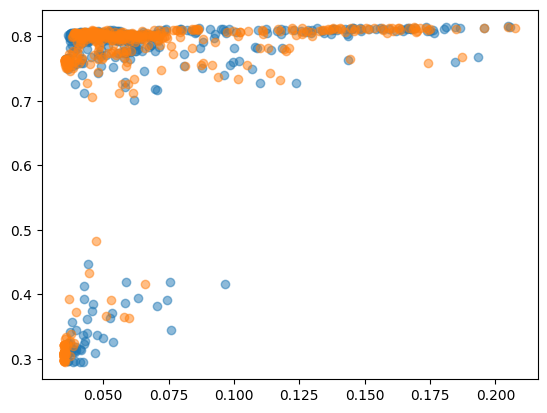

In [56]:
plt.scatter(all_marginal_fairness["value"],all_marginal_utility["value"], alpha = 0.5)
plt.scatter(all_bootstrap_fairness["value"],all_bootstrap_utility["value"],  alpha = 0.5)
# plt.xlim(0.27,0.35)
# plt.ylim(0.27,0.35)

In [16]:
def results_metrics(marginal_results,bootstrap_results, metric_name, runs):
    boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results,
                                                   metric_name = metric_name,
                                                   runs=runs)

    marginal_loss = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = metric_name,
                                                   runs=runs)
    bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
    marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
    all_results = {
        f"bootstrap_mean":bootstrap_mean,
        f"bootstrap_std":bootstrap_std,
        f"marginal_mean":marginal_mean,
        f"marginal_std":marginal_std,

    }
    return pd.DataFrame(all_results)

In [23]:

def subplots_comparison(eval_loss,eval_utility,eval_fainress,save_path):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # plot total
    ax1.plot(range(eval_loss.shape[0]), eval_loss["bootstrap_mean"],"--", label = "bootstrap")
    ax1.fill_between(x = range(eval_loss.shape[0]),
                     y1 = (eval_loss["bootstrap_mean"]-eval_loss["bootstrap_std"]).values,
                     y2 = (eval_loss["bootstrap_mean"]+eval_loss["bootstrap_std"]).values,
                     alpha = 0.2)
    ax1.plot(range(eval_loss.shape[0]), eval_loss["marginal_mean"],"--", label = "marginal")
    ax1.fill_between(x = range(eval_loss.shape[0]),
                     y1 = (eval_loss["marginal_mean"]-eval_loss["marginal_std"]).values,
                     y2 = (eval_loss["marginal_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.set_title("Balance B")
    ax1.legend()

    # plot utility
    ax2.plot(range(eval_utility.shape[0]), eval_utility["bootstrap_mean"],"--", label = "bootstrap")
    ax2.fill_between(x = range(eval_utility.shape[0]),
                     y1 = (eval_utility["bootstrap_mean"]-eval_utility["bootstrap_std"]).values,
                     y2 = (eval_utility["bootstrap_mean"]+eval_utility["bootstrap_std"]).values,
                     alpha = 0.2)
    ax2.plot(range(eval_utility.shape[0]), eval_utility["marginal_mean"],"--", label = "marginal")
    ax2.fill_between(x = range(eval_utility.shape[0]),
                     y1 = (eval_utility["marginal_mean"]-eval_utility["marginal_std"]).values,
                     y2 = (eval_utility["marginal_mean"]+eval_utility["marginal_std"]).values,
                     alpha = 0.2)
    ax2.set_title("Utility U")
    ax2.legend()

    # fairness
    ax3.plot(range(eval_fainress.shape[0]), eval_fainress["bootstrap_mean"],"--", label = "bootstrap")
    ax3.fill_between(x = range(eval_fainress.shape[0]),
                     y1 = (eval_fainress["bootstrap_mean"]-eval_fainress["bootstrap_std"]).values,
                     y2 = (eval_fainress["bootstrap_mean"]+eval_fainress["bootstrap_std"]).values,
                     alpha = 0.2)
    ax3.plot(range(eval_fainress.shape[0]), eval_fainress["marginal_mean"],"--", label = "marginal")
    ax3.fill_between(x = range(eval_fainress.shape[0]),
                     y1 = (eval_fainress["marginal_mean"]-eval_fainress["marginal_std"]).values,
                     y2 = (eval_fainress["marginal_mean"]+eval_fainress["marginal_std"]).values,
                     alpha = 0.2)
    ax3.set_title("Fairness F")
    ax3.legend()
    fig.suptitle(f"Comparison results λ = {l}")
    
    fig.savefig(save_path + f"/plots/comparison_subplots_{l}.png")
    plt.show()
    plt.close()


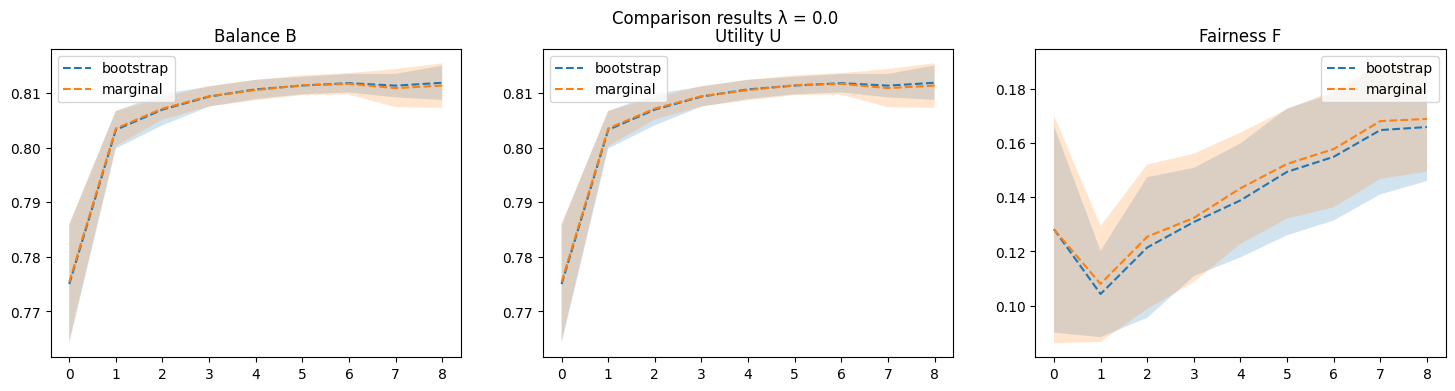

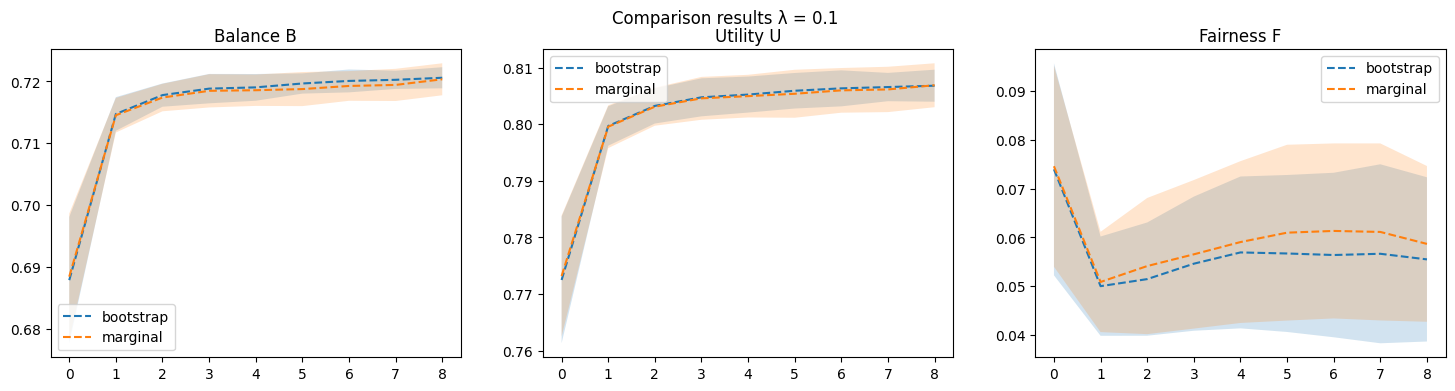

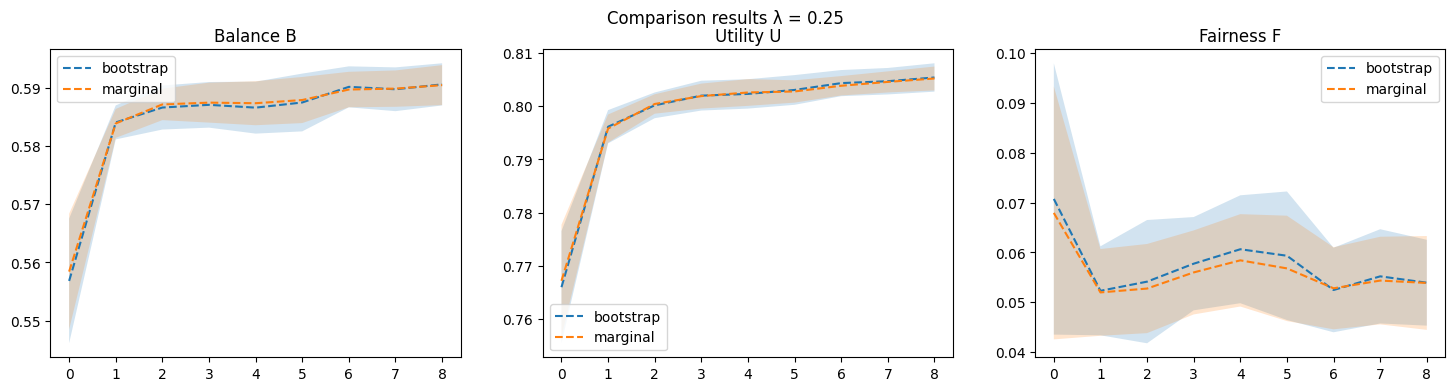

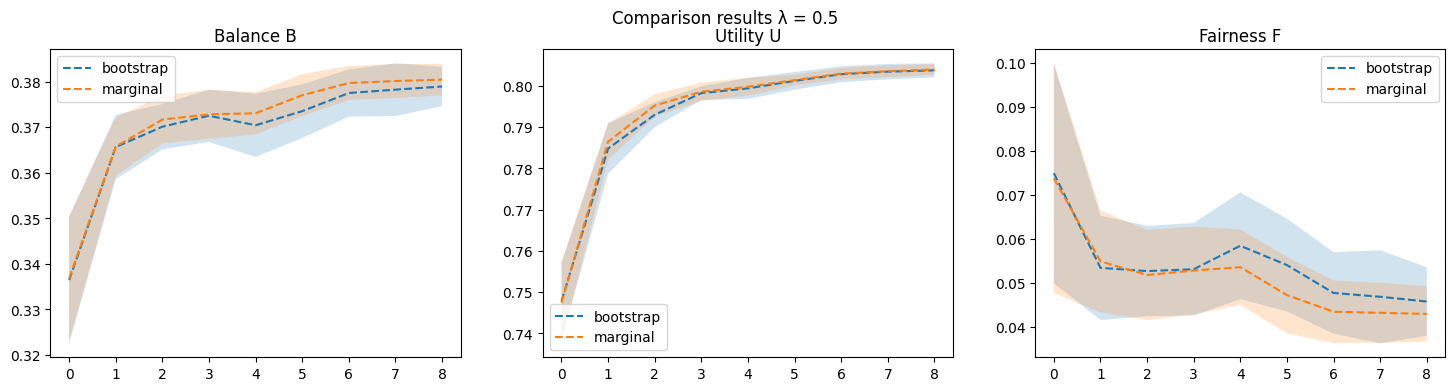

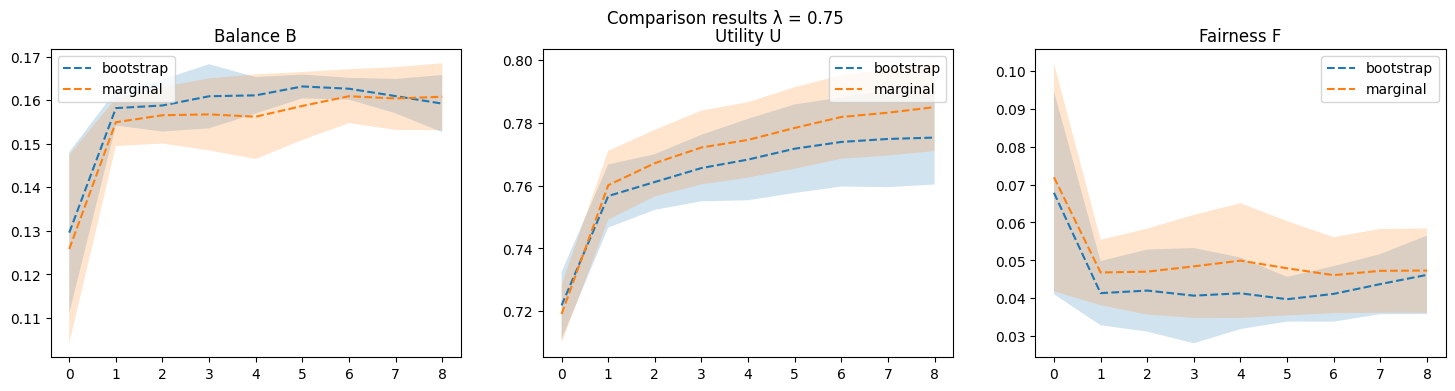

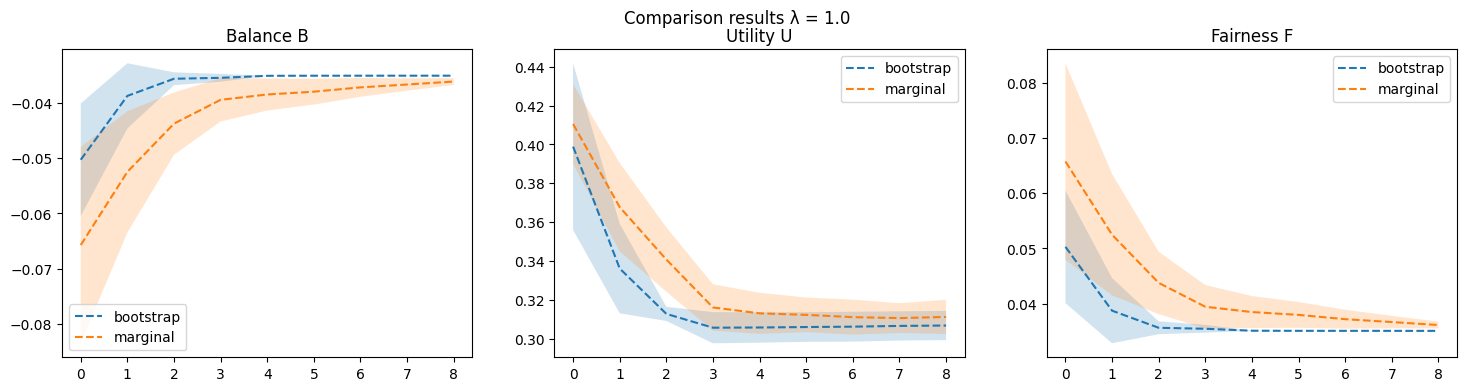

In [27]:
runs = range(8)
for l in [0.0, 0.1, 0.25, 0.5, 0.75, 1.0] :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)

    subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path= results_path )

In [14]:
l

0.0

In [50]:
eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_utility",
                                runs=runs)

eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_fairness_loss",
                                runs=runs)



In [16]:

def subplots_comparison(eval_loss,eval_utility,eval_fainress,save_path):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # plot total
    ax1.plot(range(12), eval_loss["bootstrap_mean"],"--", label = "bootstrap")
    ax1.fill_between(x = range(12),
                     y1 = (eval_loss["bootstrap_mean"]-eval_loss["bootstrap_std"]).values,
                     y2 = (eval_loss["bootstrap_mean"]+eval_loss["bootstrap_std"]).values,
                     alpha = 0.2)
    ax1.plot(range(12), eval_loss["marginal_mean"],"--", label = "marginal")
    ax1.fill_between(x = range(12),
                     y1 = (eval_loss["marginal_mean"]-eval_loss["marginal_std"]).values,
                     y2 = (eval_loss["marginal_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.set_title("Balance B")
    ax1.legend()

    # plot utility
    ax2.plot(range(12), eval_utility["bootstrap_mean"],"--", label = "bootstrap")
    ax2.fill_between(x = range(12),
                     y1 = (eval_utility["bootstrap_mean"]-eval_utility["bootstrap_std"]).values,
                     y2 = (eval_utility["bootstrap_mean"]+eval_utility["bootstrap_std"]).values,
                     alpha = 0.2)
    ax2.plot(range(12), eval_utility["marginal_mean"],"--", label = "marginal")
    ax2.fill_between(x = range(12),
                     y1 = (eval_utility["marginal_mean"]-eval_utility["marginal_std"]).values,
                     y2 = (eval_utility["marginal_mean"]+eval_utility["marginal_std"]).values,
                     alpha = 0.2)
    ax2.set_title("Utility U")
    ax2.legend()

    # fairness
    ax3.plot(range(12), eval_fainress["bootstrap_mean"],"--", label = "bootstrap")
    ax3.fill_between(x = range(12),
                     y1 = (eval_fainress["bootstrap_mean"]-eval_fainress["bootstrap_std"]).values,
                     y2 = (eval_fainress["bootstrap_mean"]+eval_fainress["bootstrap_std"]).values,
                     alpha = 0.2)
    ax3.plot(range(12), eval_fainress["marginal_mean"],"--", label = "marginal")
    ax3.fill_between(x = range(12),
                     y1 = (eval_fainress["marginal_mean"]-eval_fainress["marginal_std"]).values,
                     y2 = (eval_fainress["marginal_mean"]+eval_fainress["marginal_std"]).values,
                     alpha = 0.2)
    ax3.set_title("Fairness F")
    ax3.legend()
    fig.suptitle(f"Comparison results λ = {l}")
    
    fig.savefig(save_path + f"/plots/comparison_subplots_{l}.png")
    plt.show()
    plt.close()


In [65]:
l

1.0